# Project Statement:
### Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.
### Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.
### The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.
### As the ML Developer assigned to the HR Department, we have been asked to create ML programs to:
### 1. Perform data quality checks by checking for missing values, if any.
### 2. Understand what factors contributed most to employee turnover at EDA.
### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
### 4. Handle the left Class Imbalance using the SMOTE technique.
### 5. Perform k-fold cross-validation model training and evaluate performance.
### 6. Identify the best model and justify the evaluation metrics used.
### 7. Suggest various retention strategies for targeted employees.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load data into a data frame and check firtst 5 rows

In [184]:
# open hr_comma_sep.csv
df = pd.read_csv('hr_comma_sep.csv')

# check head of the data
print(df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

### It appears that there are 10 columns in the dataset and the 9th column is wrongly labeld as 'sales' whereas it appears to hold the value of the 'department' to which the employee belongs

In [185]:
# check the unique value of the 'sales' column
print(df['sales'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


### We will change the 'sales' column name to 'department

In [186]:
# Change the name of the column 'sales' to 'department'
df.rename(columns = {'sales':'department'}, inplace = True)

# print column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Print information about the data frame to identify any missing values or other anomalies

In [187]:
# check info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### It does not appear that any of the columns in our data set have missing values
### We will now check for unique values for our 10 columns


In [188]:
# Check the unique values for each of the 10 columns in the data
for col in df.columns:
    print(col, df[col].unique())
    print()

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

number_project [2 5 7 6 4 3]

average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 

### We will now describe the data in the numerical columns

In [8]:
# Desicribe numerical columns
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Create Visualizations for the columns that might play a factor in people leaving. Starting with Satisfaction Levels which seems a logical feature that would affect people's decision to stay in the job

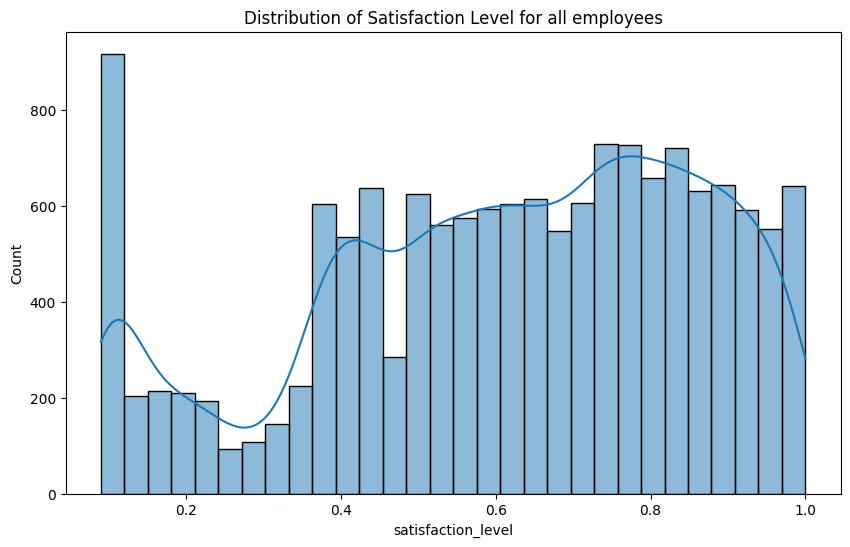

Mean Satisfaction Level for dataset: 0.6128335222348156


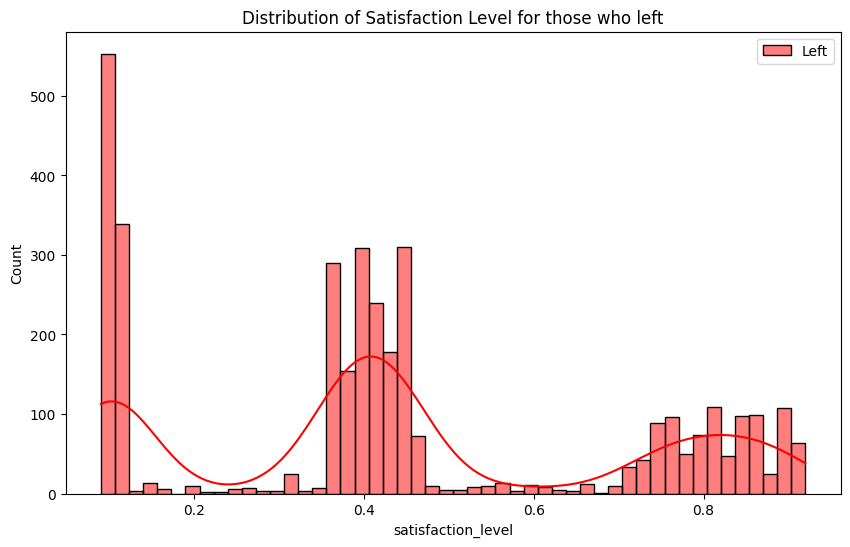

Mean Satisfaction Level for those who left: 0.4400980117614114


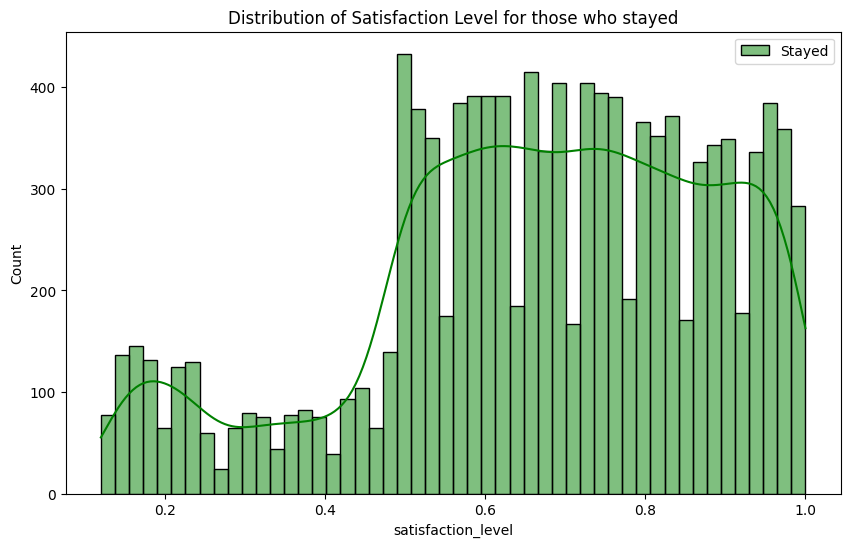

Total number of employees who left the company: 3571

Mean Satisfaction Level for those who stayed: 0.666809590479524

Total number of employees with satisfaction level less than .1: 195
Total number of employees with satisfaction level less than .1 who left: 195
Percentage of employees with satisfaction level less than .1 who left: 100.0 %
Percentage of employees with satisfaction level less than .1 who left compared to total number of employees who left: 5.46 %

Total number of employees with satisfaction level less than .15: 1045
Total number of employees with satisfaction level less than .15 who left: 905
Percentage of employees with satisfaction level less than .15 who left: 86.6 %
Percentage of employees with satisfaction level less than .15 who left compared to total number of employees who left: 25.34 %

Total number of employees with satisfaction level between .15 and .2: 433
Total number of employees with satisfaction level between .15 and .2 who left: 19
Percentage of employ

In [189]:
### Plot the distribution of the numerical columns
# plot satisfaction_level
plt.figure(figsize=(10,6))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level for all employees')
plt.show()

# Print mean satisfaction level for dataset
print('Mean Satisfaction Level for dataset:',df['satisfaction_level'].mean())

# Plot satisfaction level for those who left 
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=50)
#sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, color='green', label='Stayed')
plt.title('Distribution of Satisfaction Level for those who left')
plt.legend()
plt.show()

# print mean satisfaction level for those who left
print('Mean Satisfaction Level for those who left:',df[df['left']==1]['satisfaction_level'].mean())

# plot satisfaction_level for those who stayed
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, color='green', label='Stayed',bins=50)
plt.title('Distribution of Satisfaction Level for those who stayed')
plt.legend()
plt.show()

# Total number of employees who left the company
print('Total number of employees who left the company:',df[df['left']==1].shape[0])
print()
# print mean satisfaction level for those who stayed
print('Mean Satisfaction Level for those who stayed:',df[df['left']==0]['satisfaction_level'].mean())
print()
#Total number of employees with satisfaction level less than .1
print('Total number of employees with satisfaction level less than .1:',df[df['satisfaction_level']<0.1].shape[0])
# Total number of employees with satisfaction level less than .1 who left
print('Total number of employees with satisfaction level less than .1 who left:',df[(df['satisfaction_level']<0.1) & (df['left']==1)].shape[0])

# Total percentage of employees with satisfaction level less than .1 who left
print('Percentage of employees with satisfaction level less than .1 who left:',round(df[(df['satisfaction_level']<0.1) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.1].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .1 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .1 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.1) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

# Total number of employees with satisfaction level less than .15
print('Total number of employees with satisfaction level less than .15:',df[df['satisfaction_level']<0.15].shape[0])
# Total number of employees with satisfaction level less than .15 who left
print('Total number of employees with satisfaction level less than .15 who left:',df[(df['satisfaction_level']<0.15) & (df['left']==1)].shape[0])
#Total percentage of employees with satisfaction level less than .15 who left
print('Percentage of employees with satisfaction level less than .15 who left:',round(df[(df['satisfaction_level']<0.15) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.15].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .15 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .15 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.15) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

#Total number of employees with satisfaction level between .15 and .2
print('Total number of employees with satisfaction level between .15 and .2:',df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2)].shape[0])
# Total number of employees with satisfaction level between .15 and .2 who left
print('Total number of employees with satisfaction level between .15 and .2 who left:',df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .15 and .2 who left
print('Percentage of employees with satisfaction level between .15 and .2 who left:',round(df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .15 and .2 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .15 and .2 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

# Total Number of employees with satisfactin level less than .2
print('Total number of employees with satisfaction level less than .2:',df[df['satisfaction_level']<0.2].shape[0])
# Total Number of employees with satisfaction level less than .2 who left
print('Total number of employees with satisfaction level less than .2 who left:',df[(df['satisfaction_level']<0.2) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level less than .2 who left
print('Percentage of employees with satisfaction level less than .2 who left:',round(df[(df['satisfaction_level']<0.2) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.2].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .2 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .2 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.2) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

# Total Number of employees with satisfaction level less than .375
print('Total number of employees with satisfaction level less than .375:',df[df['satisfaction_level']<0.375].shape[0])
# Total Number of employees with satisfaction level less than .375 who left
print('Total number of employees with satisfaction level less than .375 who left:',df[(df['satisfaction_level']<0.375) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level less than .375 who left
print('Percentage of employees with satisfaction level less than .375 who left:',round(df[(df['satisfaction_level']<0.375) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.375].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .375 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .375 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.375) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total Number of employees with satisfaction level beween .2 and .375
print('Total number of employees with satisfaction level between .2 and .375:',df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375)].shape[0])
# Total Number of employees with satisfaction level between .2 and .375 who left
print('Total number of employees with satisfaction level between .2 and .375 who left:',df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .2 and .375 who left
print('Percentage of employees with satisfaction level between .2 and .375 who left:',round(df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .2 and .375 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .2 and .375 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()


# Total  Number of employees with satisfaction level between .375 and .475
print('Total number of employees with satisfaction level between .375 and .475:',df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)].shape[0])
# Total Number of employees with satisfaction level between .375 and .475 who left
print('Total number of employees with satisfaction level between .375 and .475 who left:',df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .375 and .475 who left
print('Percentage of employees with satisfaction level between .375 and .475 who left:',round(df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .375 and .475 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .375 and .475 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()


# Total Number of employees with satisfaction level less than .5
print('Total number of employees with satisfaction level less than .5:',df[df['satisfaction_level']<0.5].shape[0])
# Total Number of employees with satisfaction leel less than .5 who left
print('Total number of employees with satisfaction level less than .5 who left:',df[(df['satisfaction_level']<0.5) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level less than .5 who left
print('Percentage of employees with satisfaction level less than .5 who left:',round(df[(df['satisfaction_level']<0.5) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.5].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .5 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .5 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.5) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total Number of employees with satisfaction level between .475 and .5
print('Total number of employees with satisfaction level between .475 and .5:',df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5)].shape[0])
# Total Number of employees with satisfaction level between .475 and .5 who left
print('Total number of employees with satisfaction level between .475 and .5 who left:',df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .475 and .5 who left
print('Percentage of employees with satisfaction level between .475 and .5 who left:',round(df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .475 and .5 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .475 and .5 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total number of employees with satisfaction level between .5 and .7 
print('Total number of employees with satisfaction level between .5 and .7:',df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7)].shape[0])
# Total number of employees with satisfaction level between .5 and .7 who left
print('Total number of employees with satisfaction level between .5 and .7 who left:',df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .5 and .7 who left
print('Percentage of employees with satisfaction level between .5 and .7 who left:',round(df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .5 and .7 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .5 and .7 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total Number of employees with satisfaction level between .7 and 1
print('Total number of employees with satisfaction level between .7 and 1:',df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)].shape[0])
# Total Number of employees with satisfaction level between .7 and 1 who left
print('Total number of employees with satisfaction level between .7 and 1 who left:',df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .7 and 1 who left
print('Percentage of employees with satisfaction level between .7 and 1 who left:',round(df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .7 and 1 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .7 and 1 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()



### Looking at the mean for the entire company for satisfaction level we see that overall employees average satisfaction level is about .61
### Those who left have a satisfaction level of about .443
### Those who stayed have a satisfaction level of about .66. This suggests that satisfaction level could be a factor for those who left

### Going deeper into the distribution of satisfaction level, we see an interesting pattern
### It seems that there are 3 intervals that contain the majority of those who left, about 87% of the total people who left
### These intervals are:
### Satisfaction level less than .15 (25.34% of overall employees who left)
### Satisfacton level between .375 and .475 (35.37% of overall employees who left)
### Satisfaction level greater than .7 (26.41% of overall employees who left)

### As we can see, we have a lower satisfaction satisfaction level range among the employees who left, perhaps this is expected, since they are very unsatisfied in their jobs
### However, there is a large number of people in a range which we could call a 'moderate satisfaction' level which seems to hold the largest group of employees leaving
### Moreover, we can also see that even employees with what we could all 'high satisfaction' levels, above .7 (which is above the mean) are also leaving at slightly a higher rate than those in the 'low satisfaction' range.

### So, clearly, satisfaction level is only part of the reason why people are leaving. 


## For each of the satisfaction levels, we need to find out what is contributing to the employees leaving

### We will first divide the data into data frames that group employees by satisfaction level

In [196]:
# Define the satisfaction key satisfaction level ranges for the data
satisfaction_low = df[df['satisfaction_level']<.15]
satisfaction_med_low = df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<0.35)]
satisfaction_med = df[(df['satisfaction_level']>=0.35) & (df['satisfaction_level']<0.475)]
satisfaction_med_high = df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<0.7)]
satisfaction_high = df[df['satisfaction_level']>=0.7]

# Create List of the satisfaction levels dataframes
satisfaction_levels = [satisfaction_low, satisfaction_med_low, satisfaction_med, satisfaction_med_high, satisfaction_high]

### We will next create a function that takes in a satisfaction level and returns the statistics for that satisfaction level


In [206]:
# Function to print out statistics for each satisfaction level range. The satisfaction_level dataframe is passed to the function
def satisfaction_stats(satisfaction_level):
    print('Total number of employees at this satisfaction level:',satisfaction_level.shape[0])
    print('Total number of employees who left at this satisfaction level:',satisfaction_level[satisfaction_level['left']==1].shape[0])
    print('Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level:',round(satisfaction_level[satisfaction_level['left']==1].shape[0]/satisfaction_level.shape[0]*100,2),'%')
    print('Percentage of employees who left at this satisfaction level compared to overall total number of employees who left:',round(satisfaction_level[satisfaction_level['left']==1].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
    print()
    
    # Calculate summary statistics for the passed satisfaction_level dataframe

    print('Description for all employees with satisfaction level between: ',satisfaction_level['satisfaction_level'].min(),' and ',satisfaction_level['satisfaction_level'].max())
    level_summary = satisfaction_level.describe()
    print(level_summary)
    print()
    
    # Calculate summary statistics for the satisfaction level dataframe for those who left
    print('Description for only those employees who left with a satisfaction level between: ',satisfaction_level['satisfaction_level'].min(),' and ',satisfaction_level['satisfaction_level'].max(),' for those who left')
    level_summary_left = satisfaction_level[satisfaction_level['left']==1].describe()
    print(level_summary_left)
    print()
    
    # Calculate summary statistics for the satisfaction level dataframe for those who stayed
    print('Description for only those employees who stayed with a satisfaction level between: ',satisfaction_level['satisfaction_level'].min(),' and ',satisfaction_level['satisfaction_level'].max(),' for those who stayed')
    level_summary_stayed = satisfaction_level[satisfaction_level['left']==0].describe()
    print(level_summary_stayed)
    print()
    
    # Satisfaction level mean for those who stayed vs those who left
    print('Mean satisfaction level for those who stayed:',satisfaction_level[satisfaction_level['left']==0]['satisfaction_level'].mean())
    print('Mean satisfaction level for those who left:',satisfaction_level[satisfaction_level['left']==1]['satisfaction_level'].mean())
    print()
    
    # Last evaluation mean for those who stayed vs those who left
    print('Mean last evaluation for those who stayed:',satisfaction_level[satisfaction_level['left']==0]['last_evaluation'].mean())
    print('Mean last evaluation for those who left:',satisfaction_level[satisfaction_level['left']==1]['last_evaluation'].mean())
    print()
    
    # Average number of projects for those who stayed vs those who left
    print('Average number of projects for those who stayed:',satisfaction_level[satisfaction_level['left']==0]['number_project'].mean())
    print('Average number of projects for those who left:',satisfaction_level[satisfaction_level['left']==1]['number_project'].mean())
    print()
    
    # Average monthly hours for those who stayed vs those who left
    print('Average monthly hours for those who stayed:',satisfaction_level[satisfaction_level['left']==0]['average_montly_hours'].mean())
    print('Average monthly hours for those who left:',satisfaction_level[satisfaction_level['left']==1]['average_montly_hours'].mean())
    print()
    
    # Average time spent at the company for those who stayed vs those who left
    print('Average time spent at the company for those who stayed:',satisfaction_level[satisfaction_level['left']==0]['time_spend_company'].mean())
    print('Average time spent at the company for those who left:',satisfaction_level[satisfaction_level['left']==1]['time_spend_company'].mean())
    print()
    
    # For the categorical columns, department, salary, promotion_last_5years, and Work_accident, calculate the following statistics:
    # Count of employees in each department at this satisfaction level
    print('Count of employees in each department:')
    deptcount=satisfaction_level['department'].value_counts()
    print(deptcount)
    # Count of employees in each departnment who left at this satisfaction level
    print('Count of employees in each department who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['department'].value_counts())
    print('Percentage of employees in each department who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['department'].value_counts()/satisfaction_level['department'].value_counts()*100)
    print()
    
    
    
    #print('Count of employees in each department who left:')
    #print(satisfaction_level[satisfaction_level['left']==1]['department'].value_counts())
    #print('Percentage of employees in each department who left:')
    #print(satisfaction_level[satisfaction_level['left']==1]['department'].value_counts()/satisfaction_level['department'].value_counts()*100)
    
    print()
    # Count of employees in each salary range
    print('Count of employees in each salary range:')
    print(satisfaction_level['salary'].value_counts())
    print()
    # Count of employees in each salary range who left at this satisfaction level
    print('Count of employees in each salary range who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['salary'].value_counts())
    print()
    # Percentage of employees in each salary range who left at this satisfaction level
    print('Percentage of employees in each salary range who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['salary'].value_counts()/satisfaction_level['salary'].value_counts()*100)
    print()
    

    # Proportion of employees who left the company within each Work_accident range
    print('Proportion of employees who left the company within each Work_accident range:')
    print(satisfaction_level[satisfaction_level['left']==1]['Work_accident'].value_counts()/satisfaction_level['Work_accident'].value_counts()*100)
    print()
    

    
    

### We will now pass the satisfaction levels dataframes starting with satisfaction_low and analyze what might be contributing to employees leaving for each of those levels of satisfaction

In [208]:
# Pass satisfaction_low dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_low)


Total number of employees at this satisfaction level: 1045
Total number of employees who left at this satisfaction level: 905
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 86.6 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 25.34 %

Description for all employees with satisfaction level between:  0.09  and  0.14
       satisfaction_level  last_evaluation  number_project  \
count         1045.000000      1045.000000     1045.000000   
mean             0.106258         0.845799        5.935885   
std              0.013472         0.104147        0.937053   
min              0.090000         0.380000        2.000000   
25%              0.100000         0.800000        6.000000   
50%              0.100000         0.860000        6.000000   
75%              0.110000         0.920000        6.000000   
max              0.140000         1.000000        7.00000

## Visualizations of Factors that could be contributig to turnover per statistics above:

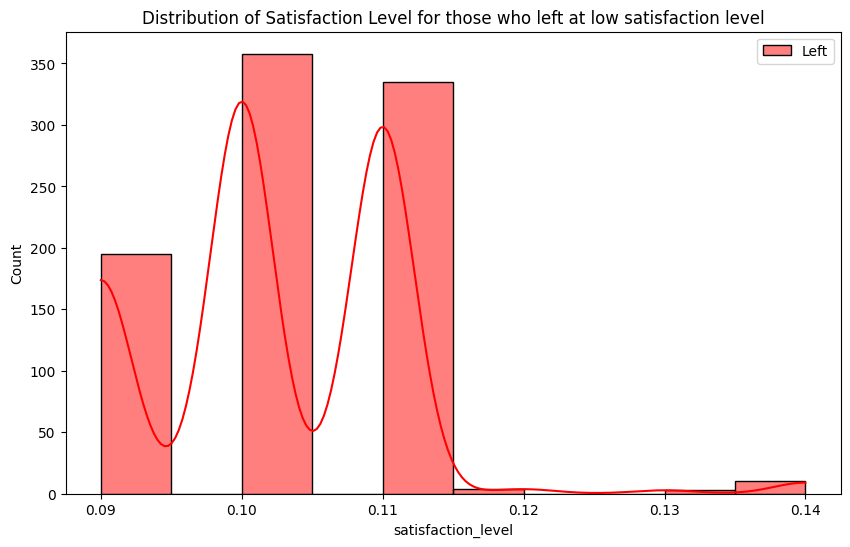

In [174]:
# Distribution of satisfaction level for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Satisfaction Level for those who left at low satisfaction level')
plt.legend()
plt.show()

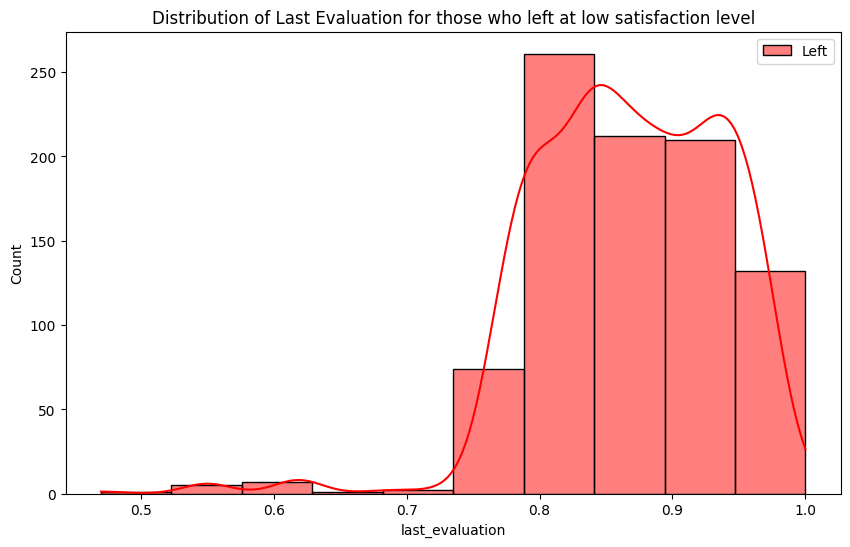

In [163]:
# Distribution of last evaluation for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['last_evaluation'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Last Evaluation for those who left at low satisfaction level')
plt.legend()
plt.show()

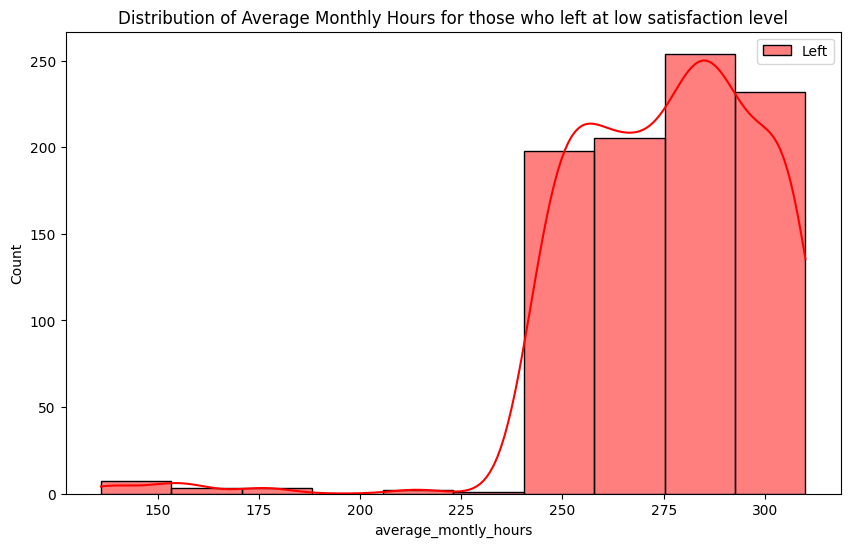

In [164]:
# Distribution of average monthly hours for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['average_montly_hours'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Average Monthly Hours for those who left at low satisfaction level')
plt.legend()
plt.show()

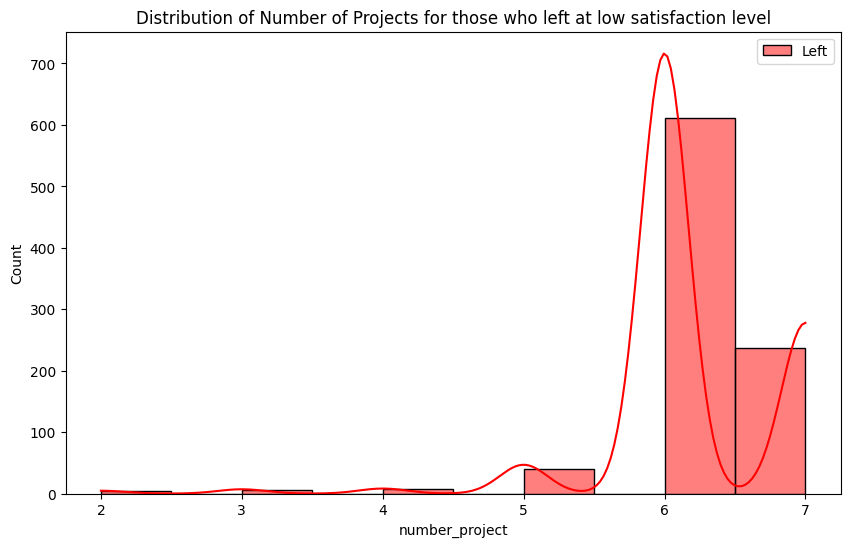

In [165]:
# Distribution of number of projects for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['number_project'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Number of Projects for those who left at low satisfaction level')
plt.legend()
plt.show()

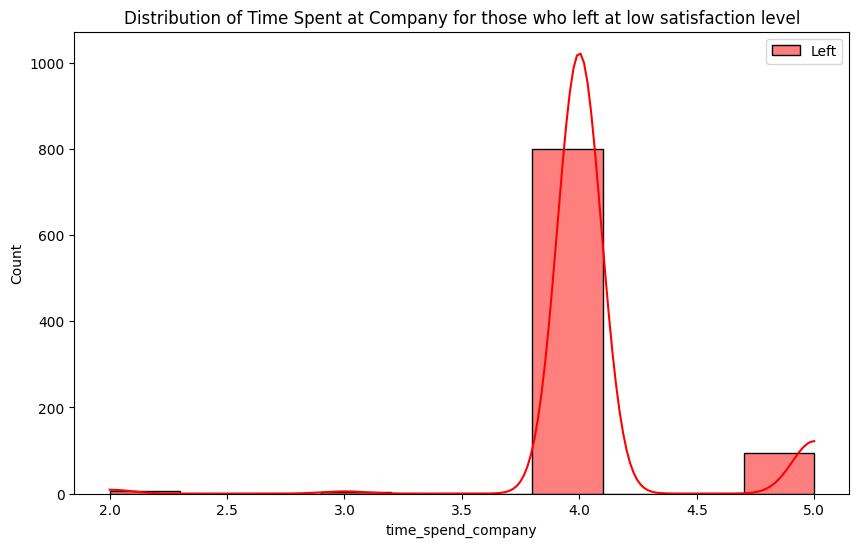

In [166]:
#Distribution of time spent at the company for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['time_spend_company'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Time Spent at Company for those who left at low satisfaction level')
plt.legend()
plt.show()


In [167]:
# Ploytly boxplot of salaries for those who left at low satisfaction level with title
import plotly.express as px
fig = px.box(satisfaction_low[satisfaction_low['left']==1], x='salary', y='satisfaction_level', points='all', title='Boxplot of Salaries for those who left at low satisfaction level')
fig.show()

# Analysis of Low Satisfaction Level Employees

## Overview

### Total number of employees at this satisfaction level: 1045
### Total number of employees who left: 905
### Percentage of employees who left: 86.6%
### Percentage of employees who left at this satisfaction level compared to the overall total: 25.34%

## Satisfaction Level

### The employees who left had a mean satisfaction level of 0.102, lower than the group's mean satisfaction level of 0.106 and significantly lower than the 0.132 mean for those who stayed. This suggests that dissatisfaction was a key factor driving these employees to leave. The distribution plot (see above) reinforces this, showing a concentration of employees who left around the 0.1 satisfaction level.

## Last Evaluation

### Interestingly, the mean last evaluation score for employees who left was 0.867, much higher than the company's overall mean of 0.716 and higher than the 0.707 mean for those who stayed. This could imply that these employees were performing well and possibly felt overworked or undervalued, despite their high performance ratings. The distribution plot of last evaluation clearly shows a skew towards higher evaluation scores for those who left.

## Number of Projects

### The number of projects assigned to employees who left was also notably high, with a mean of 6.16, compared to 4.4 for those who stayed and 3.8 for the entire company. This indicates that employees who were overloaded with projects were more likely to leave. The distribution plot for the number of projects highlights a significant cluster at 6 to 7 projects for those who left, which is above the average for the company.

## Average Monthly Hours

### The average monthly hours for those who left was 275, compared to 201 for the entire company and 205 for those who stayed. This stark difference points to overwork as a major factor in their decision to leave. The distribution plot of average monthly hours further illustrates the heavy workload on those who left.

## Time Spent at Company

### Employees who left had an average tenure of 4.08 years, slightly lower than the 4.7 years for those who stayed but above the company average of 3.5 years. This suggests that employees were leaving after gaining significant experience but before reaching long-term tenure milestones. The distribution plot of time spent at the company shows a peak at 4 years, indicating that many left after this period.

## Departmental Analysis

### Across all departments, over 80% of employees left, with HR having the highest attrition rate at 90.7%. This indicates that the issues driving employees to leave were widespread across the company, not confined to any specific department.

## Salary

### Salary did not appear to mitigate the high turnover. Both low and medium salary ranges had attrition rates above 85%, and even 48% of high-salary employees left. This suggests that even competitive pay could not compensate for the dissatisfaction and overwork experienced by these employees.

## Promotions and Work Accidents

### Promotions and work accidents seemed to have little influence on turnover at this satisfaction level. Even the small number of promoted employees all left, and while 88% of non-accident employees left, 66% of those who had accidents also left, showing no clear protective effect from either variable.

## Conclusion
### Employees with low satisfaction levels were heavily overworked, as evidenced by the high number of projects and average monthly hours. Despite their high performance evaluations, they likely felt undervalued and overwhelmed, leading to their decision to leave. Salary and promotions did not provide enough incentive to stay, and the issue was consistent across all departments. This analysis suggests a need for the company to address workload distribution and employee satisfaction more effectively to reduce turnover.

In [209]:
# Pass satisfaction_med_low dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_med_low)

Total number of employees at this satisfaction level: 1089
Total number of employees who left at this satisfaction level: 74
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 6.8 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 2.07 %

Description for all employees with satisfaction level between:  0.15  and  0.34
       satisfaction_level  last_evaluation  number_project  \
count         1089.000000      1089.000000     1089.000000   
mean             0.232011         0.695133        4.351699   
std              0.058509         0.173875        1.274863   
min              0.150000         0.360000        2.000000   
25%              0.180000         0.550000        3.000000   
50%              0.220000         0.690000        4.000000   
75%              0.280000         0.850000        5.000000   
max              0.340000         1.000000        7.000000  

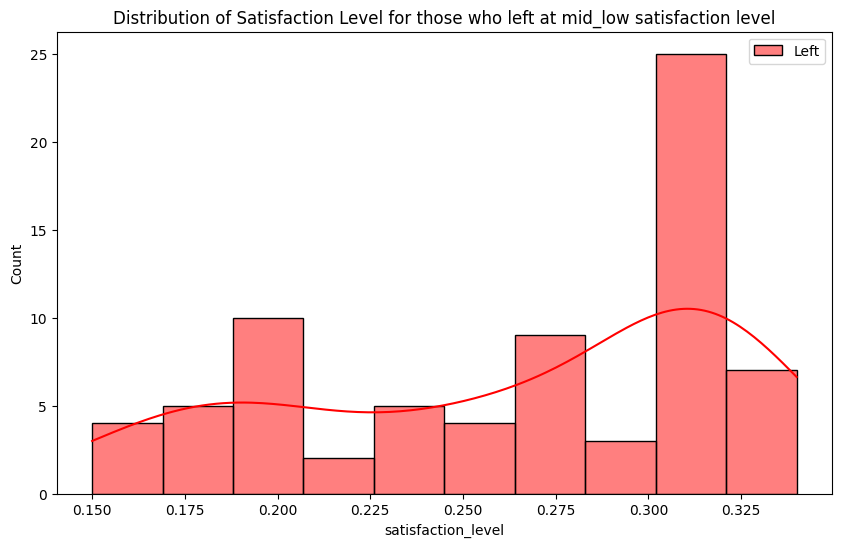

In [203]:
# Distribution of satisfaction level for those who left at mid_low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_low[satisfaction_med_low['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Satisfaction Level for those who left at mid_low satisfaction level')
plt.legend()
plt.show()


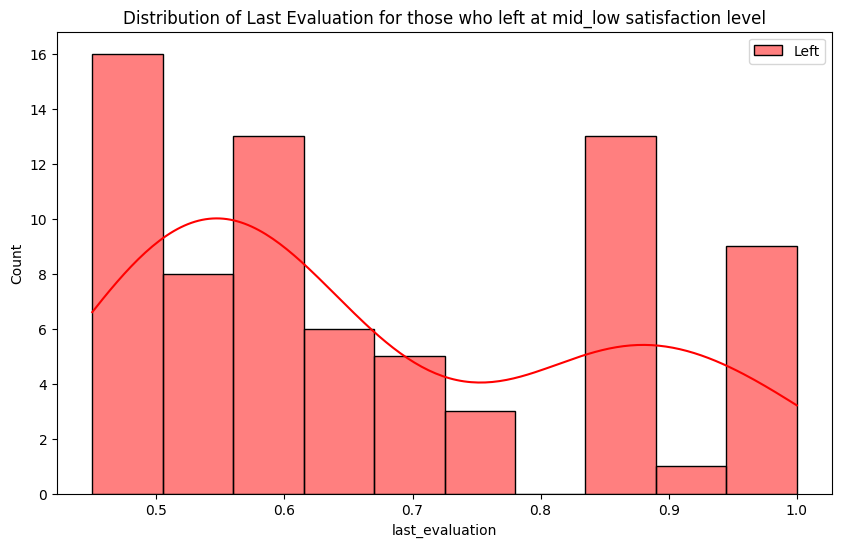

In [147]:
# Distribution of last evaluation for those who left at mid_low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_low[satisfaction_med_low['left']==1]['last_evaluation'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Last Evaluation for those who left at mid_low satisfaction level')
plt.legend()
plt.show()

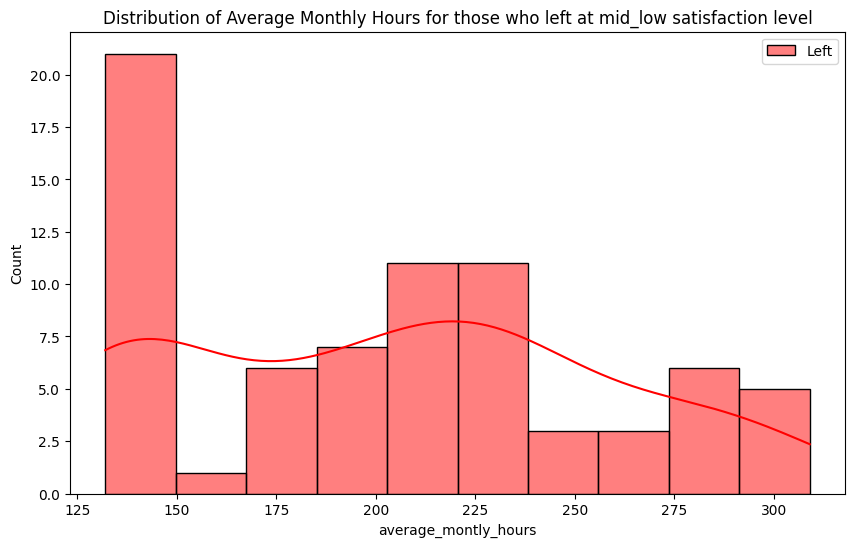

In [148]:
# Distribution of average monthly hours for those who left at mid_low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_low[satisfaction_med_low['left']==1]['average_montly_hours'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Average Monthly Hours for those who left at mid_low satisfaction level')
plt.legend()
plt.show()

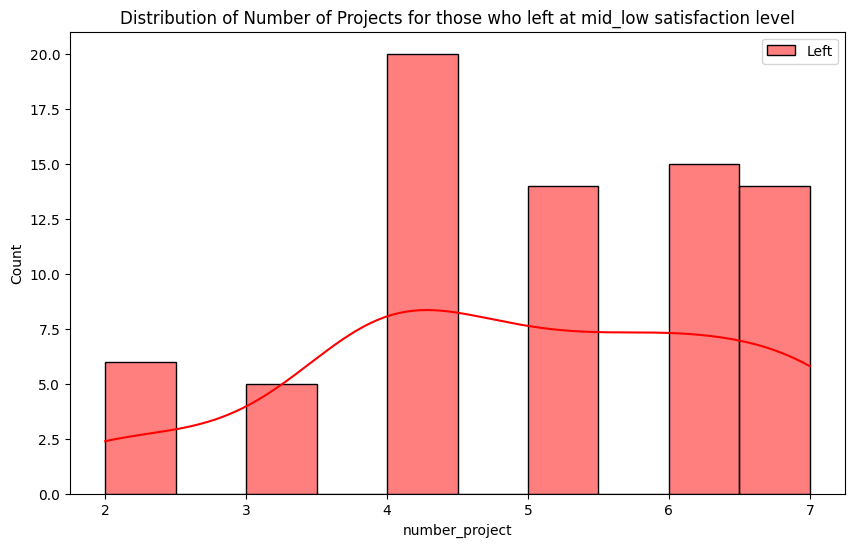

In [149]:
# Distribution of number of projects for those who left at mid_low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_low[satisfaction_med_low['left']==1]['number_project'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Number of Projects for those who left at mid_low satisfaction level')
plt.legend()
plt.show()

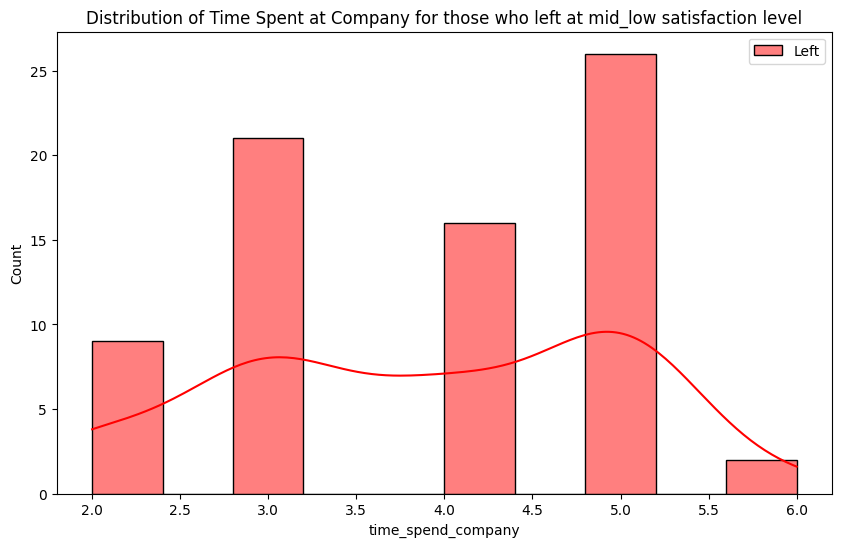

In [177]:
#Distribution of time spent at the company for those who left at mid_low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_low[satisfaction_med_low['left']==1]['time_spend_company'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Time Spent at Company for those who left at mid_low satisfaction level')
plt.legend()
plt.show()

In [178]:
# Ploytly boxplot of salaries for those who left at mid_low satisfaction level with title
import plotly.express as px
fig = px.box(satisfaction_med_low[satisfaction_med_low['left']==1], x='salary', y='satisfaction_level', points='all', title='Boxplot of Salaries for those who left at mid_low satisfaction level')
fig.show()


# Analysis of Mid-Low Satisfaction Level Employees

## Overview

### Total number of employees at this satisfaction level: 1089
### Total number of employees who left: 74
### Percentage of employees who left: 6.8%
### Percentage of employees who left at this satisfaction level compared to the overall total: 2.07%

## Satisfaction Level

### The employees who left had a mean satisfaction level of 0.264, which is higher than the group’s overall mean satisfaction of 0.232 and the 0.229 mean for those who stayed. This might suggest that even within this mid-low range of satisfaction, those who were slightly more satisfied were still leaving. The distribution plot reveals that most employees who left clustered around the 0.3 satisfaction level, indicating a potential threshold where dissatisfaction starts to outweigh the reasons for staying.

## Last Evaluation

### The mean last evaluation score for employees who left was 0.670, which is slightly lower than the group’s mean of 0.695 and also lower than the 0.696 mean for those who stayed. This suggests that lower evaluations might have contributed to employees deciding to leave, even if they weren’t in the lowest satisfaction range. The distribution plot shows a spread across various evaluation levels, indicating no strong concentration in a particular range.

## Number of Projects

### The average number of projects for employees who left was 4.93, compared to 4.35 for the overall group and 4.31 for those who stayed. This suggests that employees handling more projects were more likely to leave, even at a mid-low satisfaction level. The distribution plot shows that a significant portion of those who left had been handling 4 to 7 projects, suggesting that workload might have been a contributing factor.

## Average Monthly Hours

### Employees who left had an average of 203.1 monthly hours, which is slightly higher than the group’s mean of 196.77 and also higher than the 196.31 mean for those who stayed. While this is not as stark as the difference seen in the low satisfaction group, it still suggests that those working more hours were more likely to leave. The distribution plot highlights that those who left were spread across a wide range of working hours, with a notable concentration around 150 and 200-250 hours.

## Time Spent at Company

### The average tenure for employees who left was 3.88 years, which is slightly lower than the group’s mean of 4.30 years and also lower than the 4.33 mean for those who stayed. This suggests that employees were leaving after gaining some experience but before establishing long-term tenure. The distribution plot of time spent at the company indicates that many employees who left had spent between 2 to 5 years with the company.

## #Departmental Analysis

### The percentage of employees who left varied significantly by department, with accounting (18.42%) and support (8.22%) showing higher attrition rates compared to IT (1.35%) and R&D (5.26%). This indicates that specific departments might have faced particular challenges or dissatisfaction leading to higher turnover, even at mid-low satisfaction levels.

## Salary

### Attrition was highest among those in the low salary range (10.7%), followed by the medium salary range (3.5%), and lowest in the high salary range (1.77%). This suggests that salary had some mitigating effect on turnover, but even low satisfaction paired with low salary led to a higher likelihood of leaving.

## Promotions and Work Accidents

### None of the employees who left had received a promotion in the last 5 years, indicating that lack of career progression might have contributed to their decision to leave. Additionally, a lower proportion of those who had work accidents left (1.53%) compared to those who did not have accidents (7.95%), though this difference is less pronounced than in other satisfaction ranges.

## Conclusion

### Employees at this mid-low satisfaction level had a relatively low attrition rate overall, but those who left were often handling more projects and working more hours than those who stayed. Although their satisfaction levels were slightly higher, these employees still left, possibly due to a combination of workload, lack of career progression, and potentially feeling undervalued. Departmental differences in attrition rates in accounting suggest that this department may need more targeted interventions to improve employee retention.

In [210]:
# Pass satisfaction_med dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_med)


Total number of employees at this satisfaction level: 2091
Total number of employees who left at this satisfaction level: 1556
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 74.41 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 43.57 %

Description for all employees with satisfaction level between:  0.35  and  0.47
       satisfaction_level  last_evaluation  number_project  \
count         2091.000000      2091.000000     2091.000000   
mean             0.408890         0.542090        2.437590   
std              0.031948         0.106618        0.982772   
min              0.350000         0.360000        2.000000   
25%              0.380000         0.480000        2.000000   
50%              0.410000         0.520000        2.000000   
75%              0.440000         0.560000        2.000000   
max              0.470000         1.000000        6.000

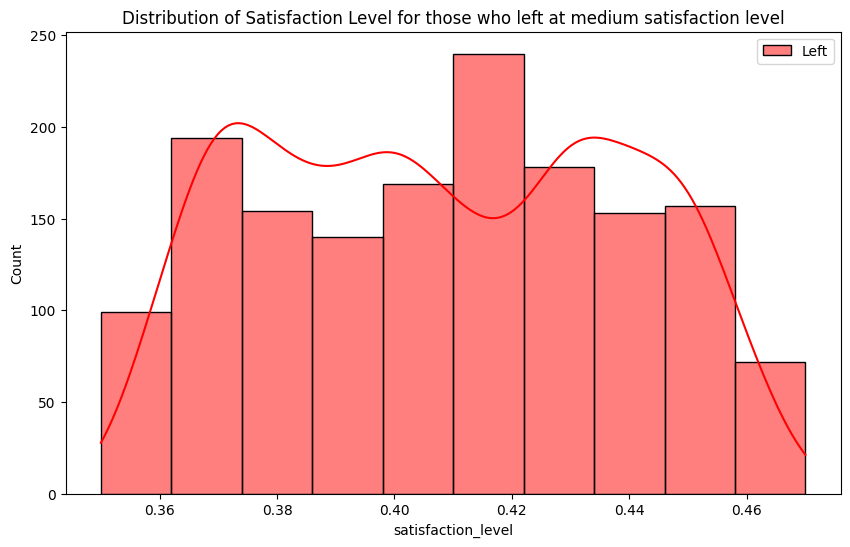

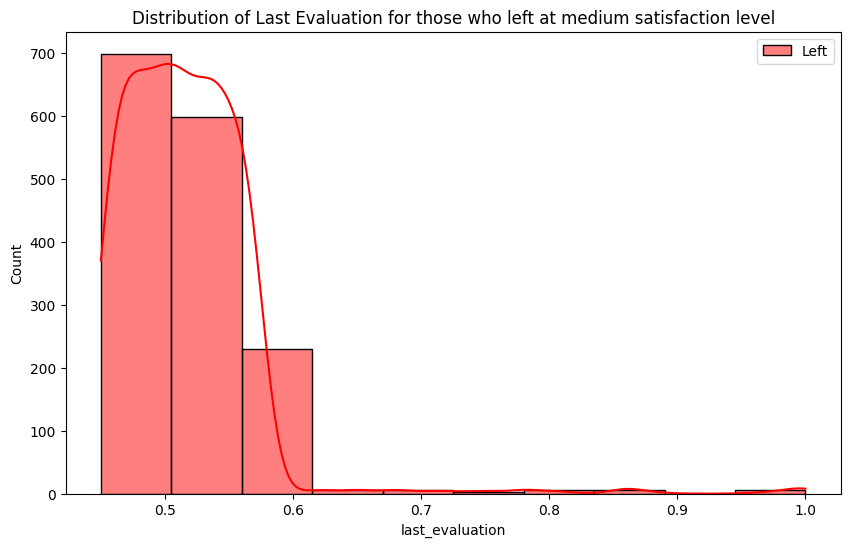

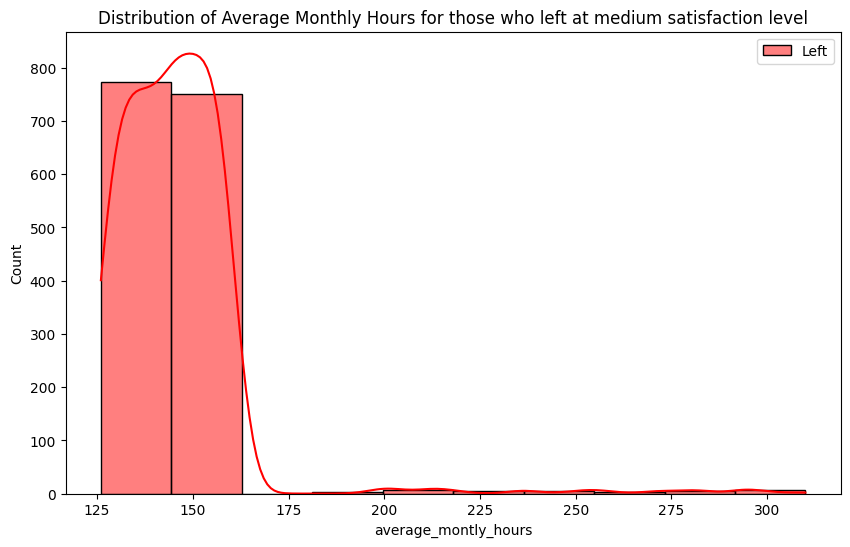

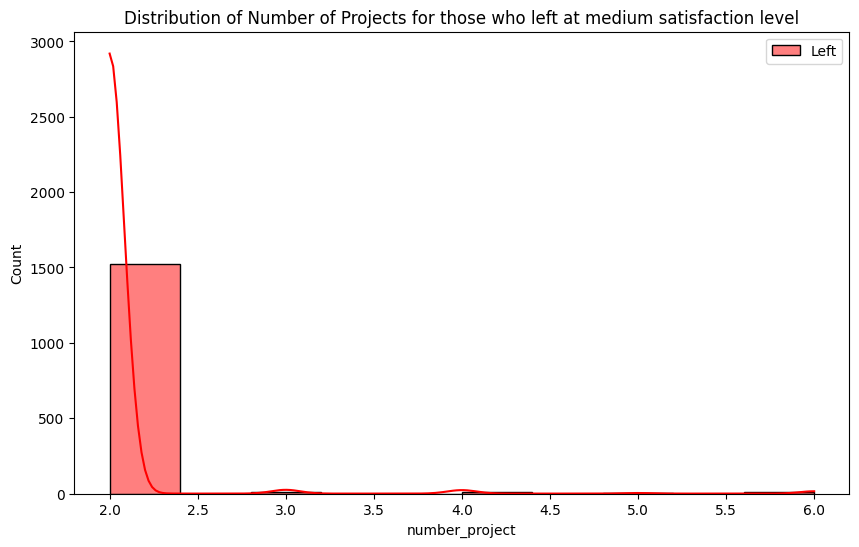

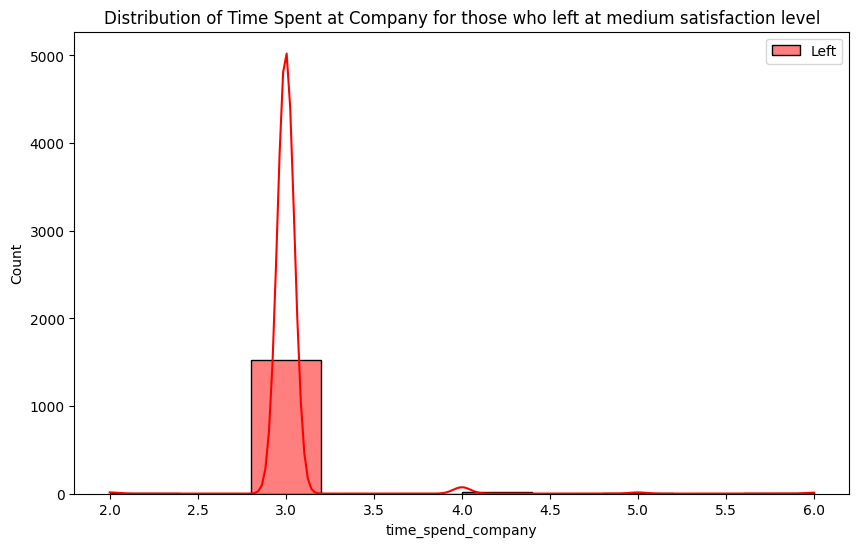

In [212]:
# Distribution of satisfaction level for those who left at medium satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med[satisfaction_med['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Satisfaction Level for those who left at medium satisfaction level')
plt.legend()
plt.show()

# Distribution of last evaluation for those who left at medium satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med[satisfaction_med['left']==1]['last_evaluation'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Last Evaluation for those who left at medium satisfaction level')
plt.legend()
plt.show()

# Distribution of average monthly hours for those who left at medium satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med[satisfaction_med['left']==1]['average_montly_hours'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Average Monthly Hours for those who left at medium satisfaction level')
plt.legend()
plt.show()

# Distribution of number of projects for those who left at medium satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med[satisfaction_med['left']==1]['number_project'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Number of Projects for those who left at medium satisfaction level')
plt.legend()
plt.show()

#Distribution of time spent at the company for those who left at medium satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med[satisfaction_med['left']==1]['time_spend_company'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Time Spent at Company for those who left at medium satisfaction level')
plt.legend()
plt.show()

# Ploytly boxplot of salaries for those who left at medium satisfaction level with title
import plotly.express as px
fig = px.box(satisfaction_med[satisfaction_med['left']==1], x='salary', y='satisfaction_level', points='all', title='Boxplot of Salaries for those who left at medium satisfaction level')
fig.show()




# Analysis of Medium Satisfaction Level Employees

## Overview

### Total number of employees at this satisfaction level: 2,091
### Total number of employees who left: 1,556
### Percentage of employees who left: 74.41%
### Percentage of employees who left at this satisfaction level compared to overall total: 43.57%

## Satisfaction Level

### The mean satisfaction level of employees who left was 0.408, which is almost the same as the mean for those who stayed at 0.410. This suggests that satisfaction level alone was not a strong determinant for leaving at this range. The distribution plot shows a relatively even spread of employees who left across the satisfaction range from 0.35 to 0.47, indicating that other factors besides satisfaction might have played a significant role.

## Last Evaluation

### ##The mean last evaluation score for employees who left was 0.516, lower than the company average and significantly lower than the 0.617 mean for those who stayed. This suggests that employees with medium satisfaction levels who had lower evaluations were more likely to leave. The distribution plot shows a sharp decline in employees who left as the last evaluation score increases, implying that better evaluations might have provided some retention incentive.


## Number of Projects

### The number of projects assigned to employees who left had a mean of 2.05, compared to 3.57 for those who stayed. This indicates that employees with fewer projects, despite having a medium satisfaction level, were more likely to leave. The distribution plot further shows that the majority of those who left had only 2 projects, which could imply either underutilization or dissatisfaction with their workload.

## Average Monthly Hours

### The average monthly hours for those who left was 145.85, compared to 173.72 for those who stayed. Employees with medium satisfaction levels who left generally worked fewer hours, suggesting that they might not have been fully engaged or motivated. The distribution plot supports this, showing a high concentration of employees who left with fewer hours.

## Time Spent at Company

### Employees who left had an average tenure of 3.02 years, slightly less than the 3.64 years for those who stayed. This indicates that employees with medium satisfaction levels tended to leave before reaching longer tenure milestones. The distribution plot of time spent at the company shows a peak at 3 years, indicating many left after this period, possibly as they assessed their career progression.

## Departmental Analysis

### The attrition rates across departments were high, with HR having the highest at 83.21%, followed by marketing at 79.26%, and sales at 76.71%. The lowest attrition was in R&D at 55.70%. This suggests that the reasons for leaving might have been more company-wide rather than department-specific, although some departments were more affected.

## Salary

### Salary did appear to have some impact, with lower salary ranges experiencing higher attrition (79.72%) compared to medium (70.63%) and high salary ranges (43.52%). The boxplot shows that even among higher salaries, a significant proportion of employees still left, indicating that salary alone was not sufficient to retain them.

## Promotions and Work Accidents

### Promotions had minimal impact, with only a small percentage of employees in this satisfaction range receiving promotions, and many of those still left. Regarding work accidents, 76.72% of employees who did not have accidents left, compared to 46.20% of those who did, suggesting that accidents may have provided a slight retention effect, perhaps due to company support or benefits during recovery.

## Conclusion

### Employees with medium satisfaction levels left the company in large numbers, driven by factors other than satisfaction, such as lower evaluations, fewer projects, and shorter tenure. Compared to the low satisfaction employees who left, this group seems to have been actually underworked. Salary and departmental differences played a role, but they were not the primary reasons for leaving. The company might need to focus on better engaging these employees by aligning workload, providing growth opportunities, and improving performance evaluation processes to reduce turnover in this group.

In [213]:
# Pass satisfaction_med_high dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_med_high)


Total number of employees at this satisfaction level: 4271
Total number of employees who left at this satisfaction level: 93
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 2.18 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 2.6 %

Description for all employees with satisfaction level between:  0.48  and  0.69
       satisfaction_level  last_evaluation  number_project  \
count         4271.000000      4271.000000     4271.000000   
mean             0.585697         0.715795        3.692344   
std              0.062971         0.162285        0.928313   
min              0.480000         0.360000        2.000000   
25%              0.530000         0.580000        3.000000   
50%              0.590000         0.710000        4.000000   
75%              0.640000         0.850000        4.000000   
max              0.690000         1.000000        7.000000  

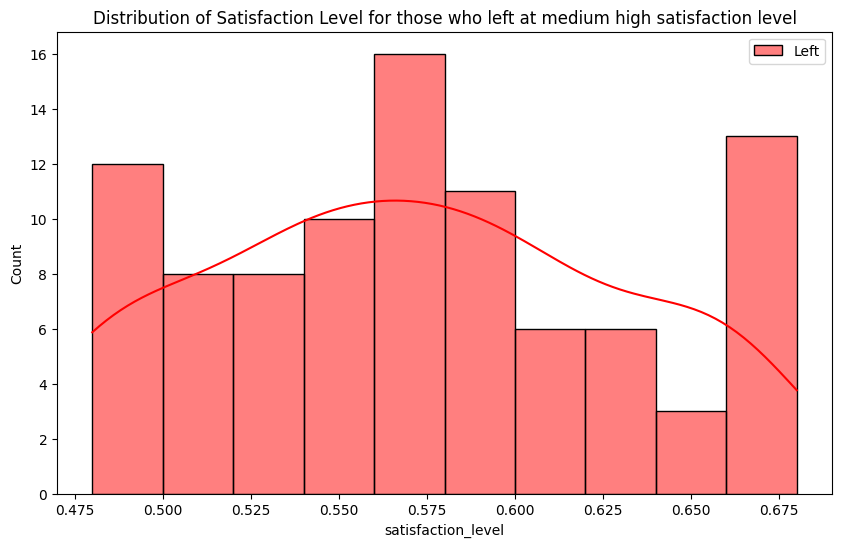

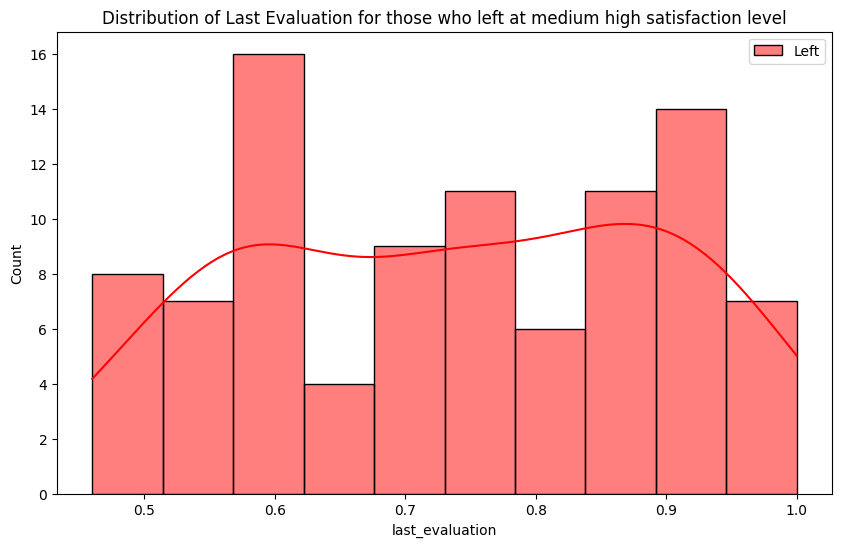

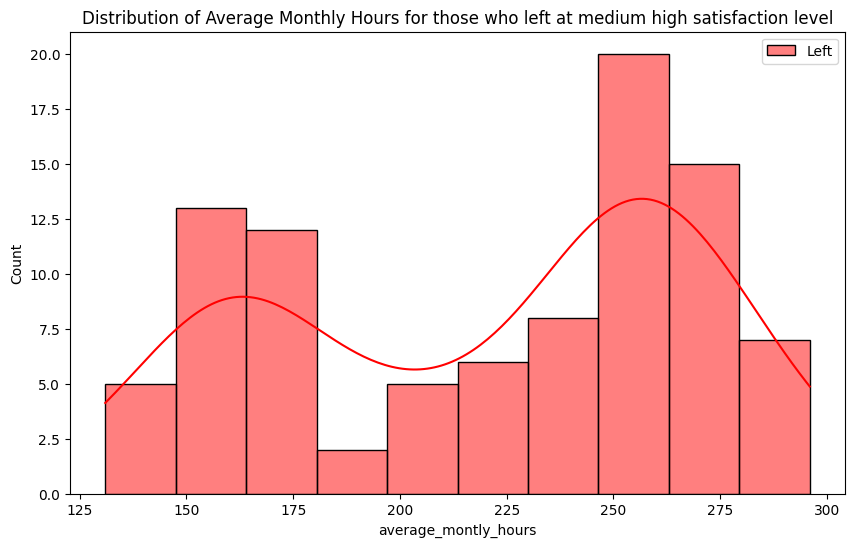

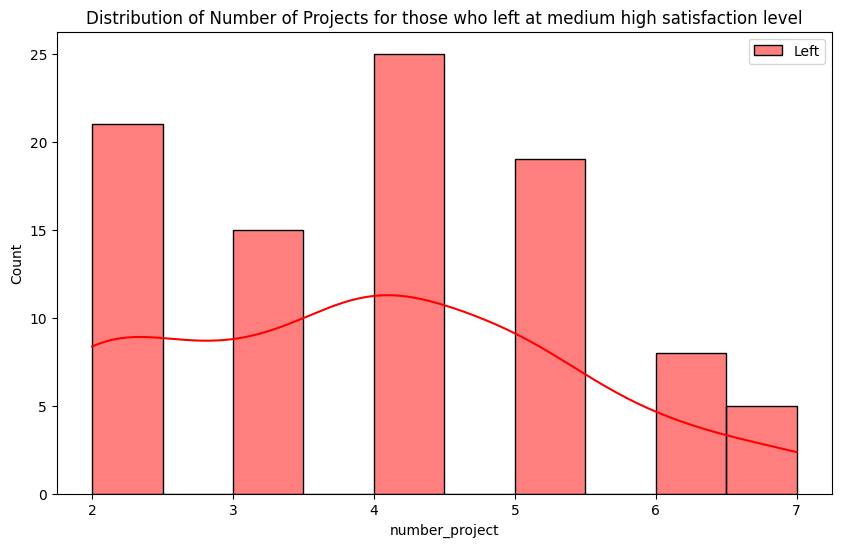

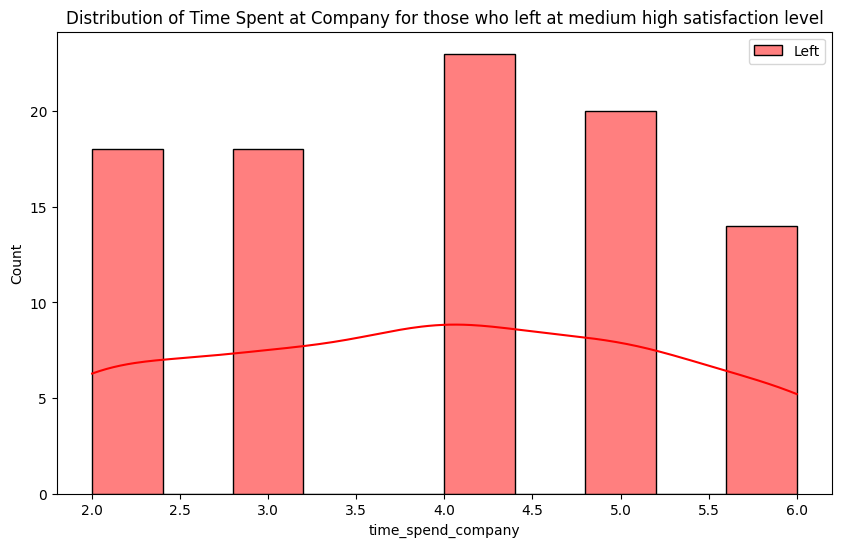

In [214]:
# Distribution of satisfaction level for those who left at medium high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_high[satisfaction_med_high['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Satisfaction Level for those who left at medium high satisfaction level')
plt.legend()
plt.show()

# Distribution of last evaluation for those who left at medium high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_high[satisfaction_med_high['left']==1]['last_evaluation'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Last Evaluation for those who left at medium high satisfaction level')
plt.legend()
plt.show()

# Distribution of average monthly hours for those who left at medium high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_high[satisfaction_med_high['left']==1]['average_montly_hours'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Average Monthly Hours for those who left at medium high satisfaction level')
plt.legend()
plt.show()

# Distribution of number of projects for those who left at medium high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_high[satisfaction_med_high['left']==1]['number_project'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Number of Projects for those who left at medium high satisfaction level')
plt.legend()
plt.show()

#Distribution of time spent at the company for those who left at medium high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_med_high[satisfaction_med_high['left']==1]['time_spend_company'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Time Spent at Company for those who left at medium high satisfaction level')
plt.legend()
plt.show()

# Ploytly boxplot of salaries for those who left at medium high satisfaction level with title
import plotly.express as px
fig = px.box(satisfaction_med_high[satisfaction_med_high['left']==1], x='salary', y='satisfaction_level', points='all', title='Boxplot of Salaries for those who left at medium high satisfaction level')
fig.show()


# Analysis of Medium-High Satisfaction Level Employees

## Overview

### Total number of employees at this satisfaction level: 4,271
### Total number of employees who left: 93
### Percentage of employees who left: 2.18%
### Percentage of employees who left at this satisfaction level compared to the overall total: 2.6%

## Satisfaction Level

### The mean satisfaction level for employees who left is 0.571, slightly lower than the group's mean satisfaction level of 0.586 and lower than the 0.586 mean for those who stayed. This suggests that while employees at this satisfaction level generally had higher satisfaction, there were still factors leading a small percentage to leave. The distribution plot shows a relatively even spread across the range, with a slight concentration around the middle values.

## Last Evaluation

### The mean last evaluation score for employees who left was 0.740, higher than the company's overall mean of 0.716 and higher than the 0.715 mean for those who stayed. This indicates that employees with high performance evaluations were more likely to leave, which may suggest feelings of being undervalued or overworked despite high performance. The distribution plot shows clusters at higher evaluation scores, reinforcing this observation.

## Number of Projects

### The number of projects assigned to employees who left was slightly higher, with a mean of 3.92 compared to 3.69 for those who stayed. This suggests that employees with more projects were more likely to leave. The distribution plot shows a concentration around 3 to 4 projects, which is within the typical range but slightly on the higher side.

## Average Monthly Hours

### The average monthly hours for those who left was 220, compared to 199 for those who stayed. This difference indicates that overwork could have been a contributing factor to their decision to leave. The distribution plot shows a peak around 240 to 250 hours, suggesting that those who left were working significantly more hours than the company average.

## Time Spent at Company

### Employees who left had an average tenure of 3.94 years, slightly higher than the 3.28 years for those who stayed. This suggests that employees with a longer tenure may have been more likely to leave, possibly due to a lack of further growth opportunities or increased job dissatisfaction over time. The distribution plot shows peaks around the 4 to 5-year mark, indicating a trend of leaving after reaching a certain tenure.

## Departmental Analysis

### The departmental analysis shows that the attrition rate varies by department, with the highest attrition rates in HR (3.86%) and Technical (3.88%). This indicates that while overall attrition at this satisfaction level is low, certain departments have slightly higher turnover, which may be related to specific departmental challenges or cultures.

## Salary

### #Salary analysis shows that employees with low salaries had a higher attrition rate of 2.95%, compared to 1.76% for medium salaries and 0.68% for high salaries. This suggests that lower-paid employees were more likely to leave, even within this higher satisfaction range. The boxplot further supports this, showing a concentration of those who left within the low salary range.

## Promotions and Work Accidents

### #Promotions and work accidents had minimal influence on turnover at this satisfaction level. Only 2.58% of employees without work accidents left, and just 0.27% of those with work accidents left. Similarly, none of the employees who left had received a promotion in the last 5 years, indicating that a lack of career advancement might have been a factor.

## Conclusion

### Employees with medium-high satisfaction levels generally had lower attrition rates, but those who left tended to work more hours, had slightly higher evaluation scores, and more projects. Departments like HR and Technical had slightly higher turnover, and lower salary ranges also correlated with higher attrition. This analysis suggests that even at higher satisfaction levels, overwork and pay dissatisfaction can still drive some employees to leave.

In [215]:
# Pass satisfaction_high dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_high)


Total number of employees at this satisfaction level: 6503
Total number of employees who left at this satisfaction level: 943
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 14.5 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 26.41 %

Description for all employees with satisfaction level between:  0.7  and  1.0
       satisfaction_level  last_evaluation  number_project  \
count         6503.000000      6503.000000     6503.000000   
mean             0.841410         0.754925        3.880209   
std              0.086078         0.160655        0.905542   
min              0.700000         0.360000        2.000000   
25%              0.770000         0.620000        3.000000   
50%              0.840000         0.770000        4.000000   
75%              0.910000         0.890000        5.000000   
max              1.000000         1.000000        6.000000 

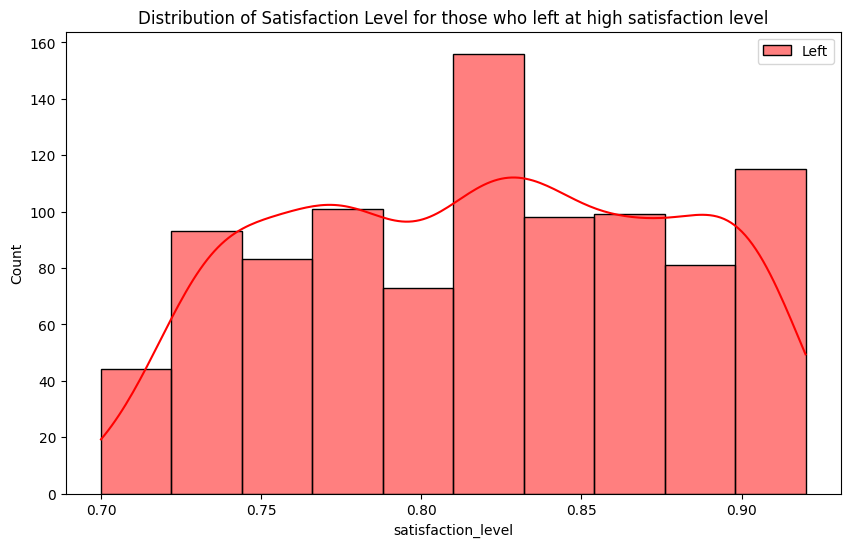

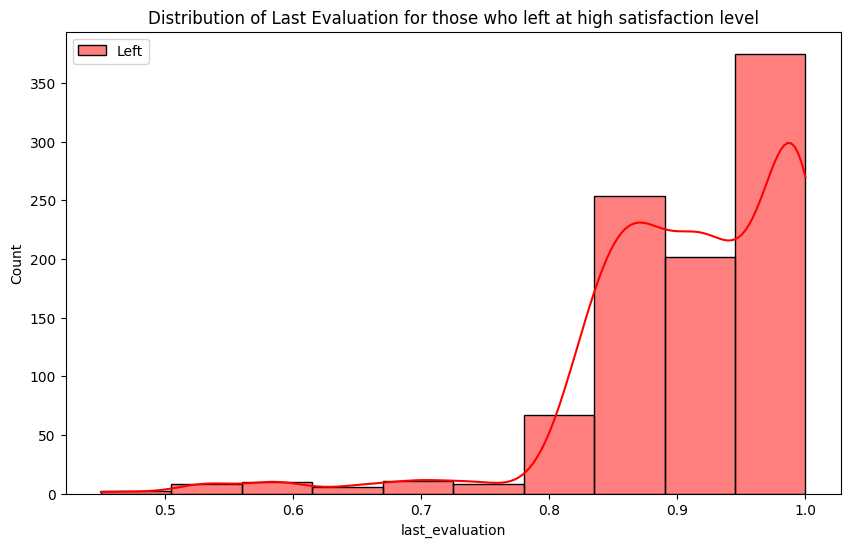

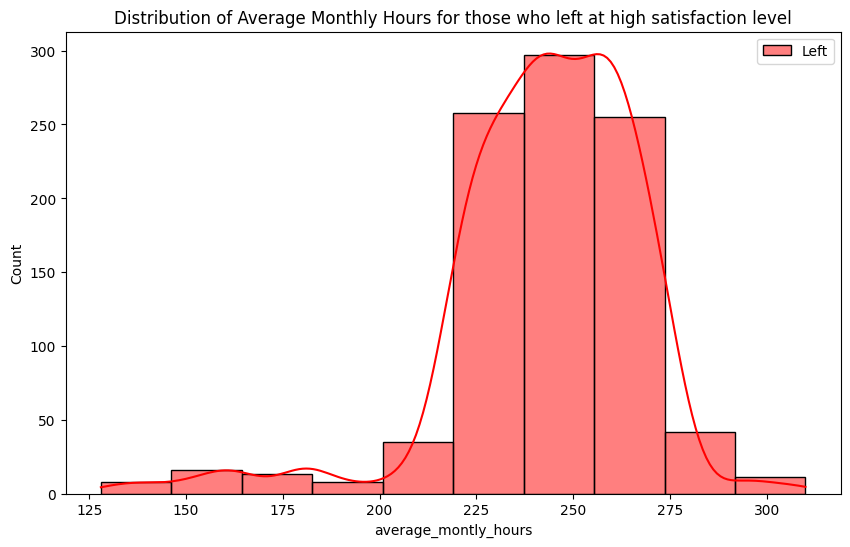

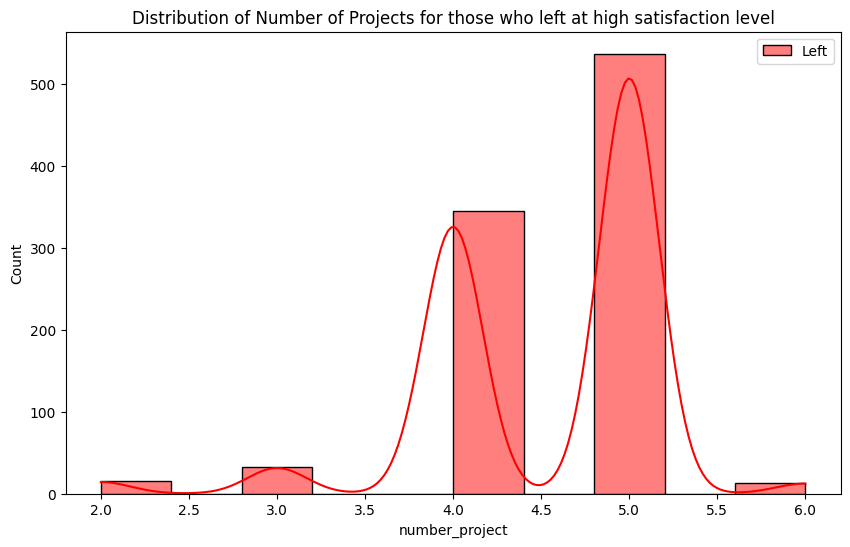

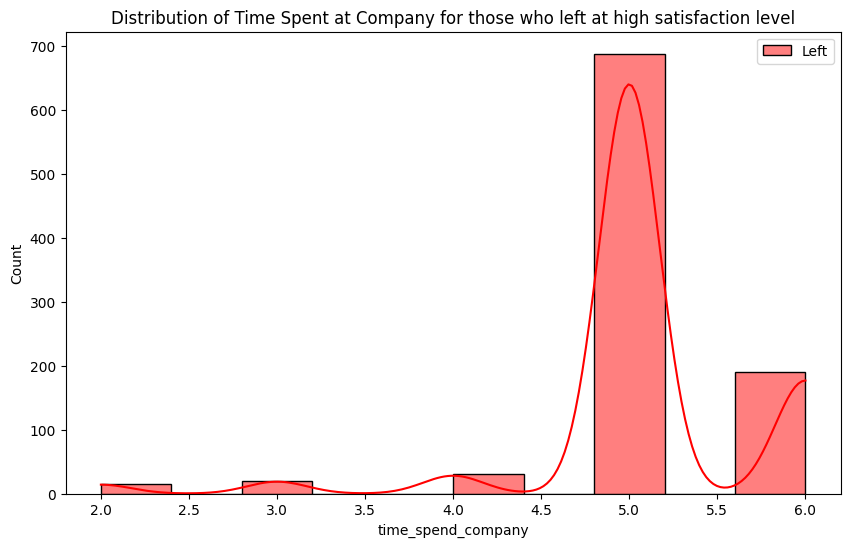

In [216]:
# Distribution of satisfaction level for those who left at high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_high[satisfaction_high['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Satisfaction Level for those who left at high satisfaction level')
plt.legend()
plt.show()

# Distribution of last evaluation for those who left at high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_high[satisfaction_high['left']==1]['last_evaluation'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Last Evaluation for those who left at high satisfaction level')
plt.legend()
plt.show()

# Distribution of average monthly hours for those who left at high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_high[satisfaction_high['left']==1]['average_montly_hours'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Average Monthly Hours for those who left at high satisfaction level')
plt.legend()
plt.show()

# Distribution of number of projects for those who left at high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_high[satisfaction_high['left']==1]['number_project'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Number of Projects for those who left at high satisfaction level')
plt.legend()
plt.show()

#Distribution of time spent at the company for those who left at high satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_high[satisfaction_high['left']==1]['time_spend_company'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Time Spent at Company for those who left at high satisfaction level')
plt.legend()
plt.show()

# Ploytly boxplot of salaries for those who left at high satisfaction level with title
import plotly.express as px
fig = px.box(satisfaction_high[satisfaction_high['left']==1], x='salary', y='satisfaction_level', points='all', title='Boxplot of Salaries for those who left at high satisfaction level')
fig.show()


# Analysis of High Satisfaction Level Employees

## Overview

### Total number of employees at this satisfaction level: 6,503
### Total number of employees who left: 943
### Percentage of employees who left: 14.5%
### Percentage of employees who left at this satisfaction level compared to the overall total: 26.41%

## Satisfaction Level

### The mean satisfaction level for employees who left is 0.818, which is slightly lower than the mean satisfaction level of 0.841 for the group and 0.845 for those who stayed. This indicates that although these employees were generally satisfied, there were still factors prompting them to leave. The distribution plot shows that the satisfaction levels of those who left are spread across the high range, with peaks around the 0.8 mark.

## Last Evaluation

### The mean last evaluation score for employees who left was 0.910, which is significantly higher than the overall group mean of 0.755 and much higher than the 0.729 mean for those who stayed. This suggests that high-performing employees were more likely to leave, possibly due to being overworked or feeling underappreciated despite their high performance. The distribution plot shows a strong cluster at the highest evaluation scores, reinforcing this observation.

## Number of Projects

### Employees who left had an average of 4.53 projects, which is higher than the 3.88 projects for the entire group and 3.77 projects for those who stayed. This suggests that employees with a higher number of projects were more likely to leave, potentially due to the pressure or workload associated with handling multiple projects. The distribution plot highlights a concentration around 4 to 5 projects.

## Average Monthly Hours

### The average monthly hours for those who left was 242.86, compared to 207.58 for the entire group and 201.59 for those who stayed. This significant difference indicates that overwork could have been a major factor in their decision to leave. The distribution plot shows a clear peak around 240 to 250 hours, suggesting that those who left were working more hours than their peers.

## Time Spent at Company

### Employees who left had an average tenure of 5.08 years, which is higher than the 3.49 years for the entire group and 3.22 years for those who stayed. This suggests that longer-tenured employees were more likely to leave, possibly due to a lack of further career growth opportunities or increasing job dissatisfaction over time. The distribution plot shows a peak around the 5-year mark, indicating a trend of leaving after reaching a certain tenure.

## Departmental Analysis

### The departmental analysis shows that the attrition rate varies by department, with the highest attrition rates in Product Management (16.58%), HR (16.05%), and Technical (16.03%). This indicates that while the overall attrition rate is moderate at this satisfaction level, certain departments experience higher turnover, potentially due to specific departmental challenges or cultures.

## Salary

### Salary analysis reveals that employees with low salaries had a higher attrition rate of 18.48%, compared to 12.43% for medium salaries and only 2.75% for high salaries. This suggests that lower-paid employees were more likely to leave, even within this higher satisfaction range. The boxplot supports this, showing a concentration of those who left within the low salary range.

## Promotions and Work Accidents

### Promotions and work accidents had some influence on turnover at this satisfaction level. About 16.32% of employees without work accidents left, while only 4.58% of those with work accidents left. The promotion rate among those who left was also minimal, with only 0.42% of employees who left having received a promotion in the last 5 years, indicating that a lack of career advancement might have been a factor.

## Conclusion
### Employees with high satisfaction levels accounted for about 26% of all the employees who left the compnay. Those who left were characterized by higher last evaluation scores, more projects, longer tenures, and higher average monthly hours, suggesting that overwork and possibly lack of recognition played significant roles in their decision to leave. Departments such as Product Management, HR, and Technical had the highest turnover, and lower salary ranges correlated with higher attrition. This analysis suggests that even at high satisfaction levels, issues like workload, recognition, and compensation can still drive employees to leave.

### In order to do correlation for the 'salary' column we'll convert that column into one_hot encoding

In [217]:
# Convert the 'salary' column to numerical values using dummy variables
df = pd.get_dummies(df, columns=['salary'], drop_first=True,dtype='int64')
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary_low  salary_medium  
0      

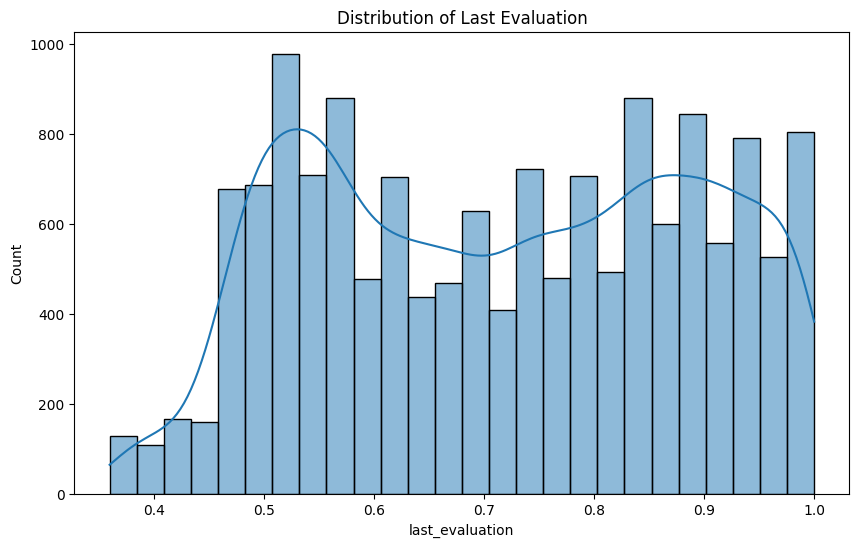


Correlation between satisfaction level and salary columns: -0.04741456626505596 0.03136695476614563
Correlation between left and salary columns: 0.13472197414242132 -0.06883296808670487
Correlation between left and low salary: 0.13472197414242132
Correlation between left with satisfaction level less than .5 and low salary: -0.04504129574203137


In [ ]:
# plot last_evaluation
plt.figure(figsize=(10,6))
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Distribution of Last Evaluation')
plt.show()
print()
# print correlation between satisfaction level and salary columns
print('Correlation between satisfaction level and salary columns:',df['satisfaction_level'].corr(df['salary_low']),df['satisfaction_level'].corr(df['salary_medium']))
# print correlation between left and salary columns
print('Correlation between left and salary columns:',df['left'].corr(df['salary_low']),df['left'].corr(df['salary_medium']))
# print correlation between left and low salary
print('Correlation between left and low salary:',df['left'].corr(df['salary_low']))
# print correlation between left with satisfaction level less than .5 and low salary
# Filter the DataFrame based on the conditions
filtered_df = df[(df['satisfaction_level'] < 0.5) & (df['salary_low'] == 1)]

# Compute the correlation between 'left' and 'satisfaction_level' or any other column
correlation = filtered_df['left'].corr(filtered_df['satisfaction_level'])

print('Correlation between left with satisfaction level less than .5 and low salary:', correlation)


## We'll do one-hot encoding for the department column 

In [ ]:
# We'll implement one-hot encoding for 'department' column
df = pd.get_dummies(df, columns=['department'], drop_first=True,dtype='int64')
print(df.head())
print()
df.info()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary_low  \
0                   3              0     1                      0           1   
1                   6              0     1                      0           0   
2                   4              0     1                      0           0   
3                   5              0     1                      0           1   
4                   3              0     1                      0           1   

   salary_medium  department_Ran

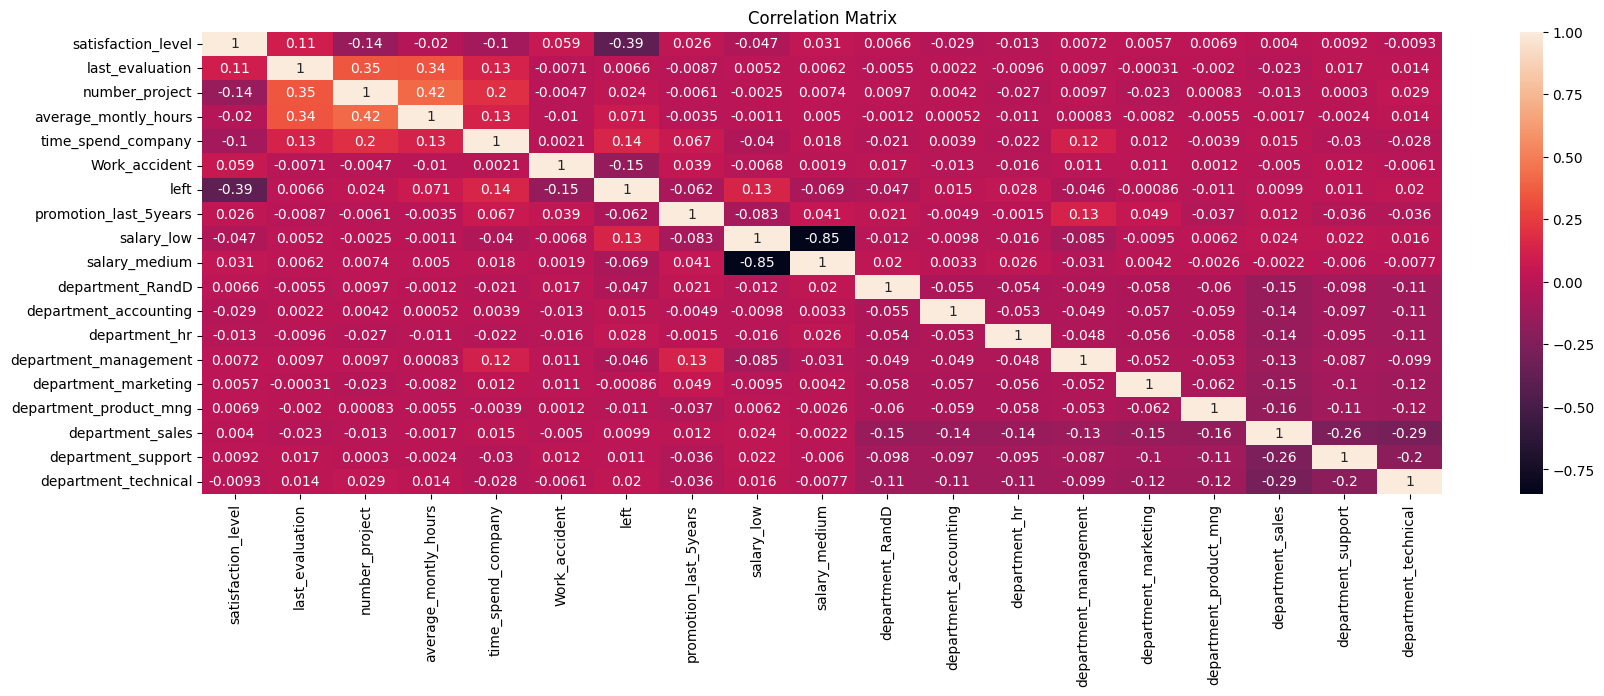

Number of employees who left by department:
department_RandD
0    3450
1     121
Name: count, dtype: int64
department_accounting
0    3367
1     204
Name: count, dtype: int64
department_hr
0    3356
1     215
Name: count, dtype: int64
department_management
0    3480
1      91
Name: count, dtype: int64
department_marketing
0    3368
1     203
Name: count, dtype: int64
department_product_mng
0    3373
1     198
Name: count, dtype: int64
department_sales
0    2557
1    1014
Name: count, dtype: int64
department_support
0    3016
1     555
Name: count, dtype: int64
department_technical
0    2874
1     697
Name: count, dtype: int64
Total number of employees who left: 3571


In [ ]:
# Plot the correlation matrix for numerical columns
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Print counts of employees who left by encoded department
print('Number of employees who left by department:')
#print(df[df['left']==1]['department_IT'].value_counts())
print(df[df['left']==1]['department_RandD'].value_counts())
print(df[df['left']==1]['department_accounting'].value_counts())
print(df[df['left']==1]['department_hr'].value_counts())
print(df[df['left']==1]['department_management'].value_counts())
print(df[df['left']==1]['department_marketing'].value_counts())
print(df[df['left']==1]['department_product_mng'].value_counts())
print(df[df['left']==1]['department_sales'].value_counts())
print(df[df['left']==1]['department_support'].value_counts())
print(df[df['left']==1]['department_technical'].value_counts())
#print total number of employees who left
print('Total number of employees who left:',df[df['left']==1].shape[0])

        



